# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
# set this so the 
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt

In [2]:
online_rt = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv", encoding = "ISO-8859-1", error_bad_lines = False)
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

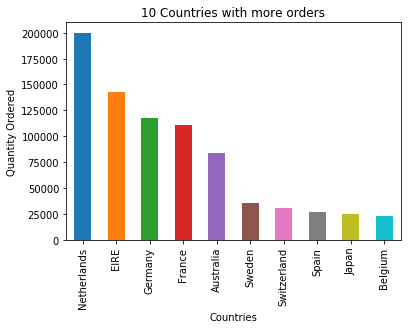

In [3]:
s = online_rt[online_rt['Country'] != "United Kingdom"].groupby('Country').Quantity.agg('sum').sort_values(ascending = False).head(10)
s.plot(kind = "bar")

plt.xlabel("Countries")
plt.ylabel("Quantity Ordered")
plt.title('10 Countries with more orders')

plt.show()

### Step 5.  Exclude negative Quatity entries

In [4]:
online_rt = online_rt[online_rt['Quantity'] > 0]

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

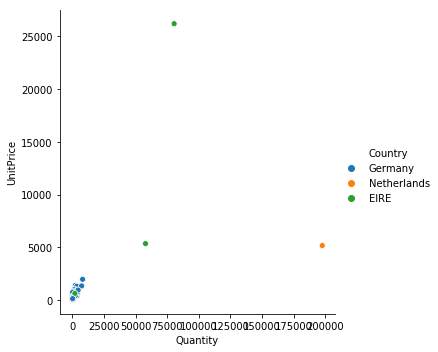

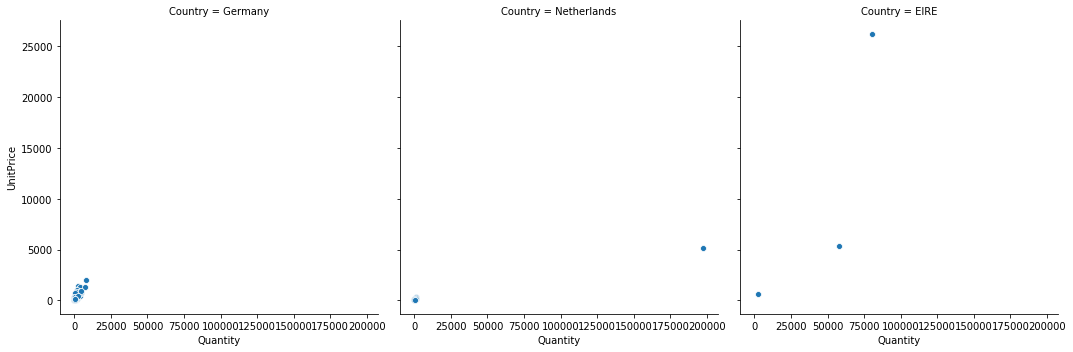

In [5]:
customers = online_rt.groupby(['CustomerID','Country']).sum()
customers = customers[customers.UnitPrice > 0]

top_countries = ['Netherlands', 'EIRE', 'Germany']
customers['Country'] = customers.index.get_level_values(1)
customers = customers[customers['Country'].isin(top_countries)]
g = sns.relplot(x = "Quantity", y="UnitPrice", hue = "Country", data = customers)
g = sns.relplot(x = "Quantity", y="UnitPrice", col = "Country", data = customers)